In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
data=pd.read_csv('adult.csv')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [70]:
data.replace('?',np.nan,inplace=True)
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [71]:
data.isnull().sum()
data.shape

(48842, 15)

In [72]:
data.dropna(how='any',inplace=True)
data.shape

(45222, 15)

In [73]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
data.drop(['education'], axis = 1, inplace = True)

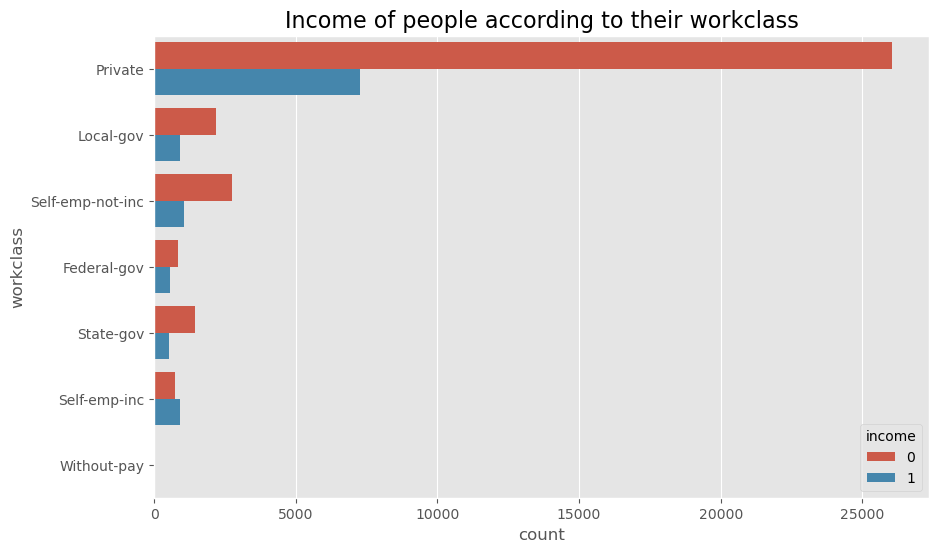

In [74]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their workclass", fontsize = 16)
sns.countplot(y = data['workclass'], hue = data['income'])
plt.show()

In [75]:
occupation_enc = (data.groupby('occupation').size()) / len(data)
print(occupation_enc)

occupation
Adm-clerical         0.122507
Armed-Forces         0.000310
Craft-repair         0.133121
Exec-managerial      0.132325
Farming-fishing      0.032727
Handlers-cleaners    0.045243
Machine-op-inspct    0.065676
Other-service        0.106320
Priv-house-serv      0.005130
Prof-specialty       0.132856
Protective-serv      0.021582
Sales                0.119588
Tech-support         0.031401
Transport-moving     0.051214
dtype: float64


In [76]:
data['occupation_enc'] = data['occupation'].apply(lambda x : occupation_enc[x])
data['occupation_enc'].head(3)
workclass_enc = (data.groupby('workclass').size()) / len(data)
print(workclass_enc)

workclass
Federal-gov         0.031091
Local-gov           0.068551
Private             0.736522
Self-emp-inc        0.036398
Self-emp-not-inc    0.083941
State-gov           0.043032
Without-pay         0.000464
dtype: float64


In [77]:
data['workclass_enc'] = data['workclass'].apply(lambda x : workclass_enc[x])
data['workclass_enc'].head(3)

0    0.736522
1    0.736522
2    0.068551
Name: workclass_enc, dtype: float64

In [78]:
data['native-country'].loc[data['native-country'] == 'United-States'] = 'usa'
data['native-country'].loc[data['native-country'] != 'usa'] = 'non_usa'
data['native-country'].value_counts()
data['country_enc'] = data['native-country'].map({'usa' : 1, 'non_usa' : 0})
data.drop(['native-country'], axis = 1, inplace = True)
data['sex_enc'] = data['gender'].map({'Male' : 1, 'Female' : 0})
data.drop(['gender'], axis = 1, inplace = True)
marital_status_enc = (data.groupby('marital-status').size()) / len(data)
print(marital_status_enc)
data['marital_status_enc'] = data['marital-status'].apply(lambda x : marital_status_enc[x])
data['marital_status_enc'].head(3)
data.drop(['marital-status'], axis = 1, inplace = True)
race_enc = (data.groupby('race').size()) / len(data)
print(race_enc,'\n')
data['race_enc'] = data['race'].apply(lambda x : race_enc[x])

marital-status
Divorced                 0.139246
Married-AF-spouse        0.000708
Married-civ-spouse       0.465592
Married-spouse-absent    0.012206
Never-married            0.322807
Separated                0.031202
Widowed                  0.028238
dtype: float64
race
Amer-Indian-Eskimo    0.009619
Asian-Pac-Islander    0.028813
Black                 0.093494
Other                 0.007806
White                 0.860267
dtype: float64 



In [79]:
relationship_enc = (data.groupby('relationship').size()) / len(data)
print(relationship_enc)
data['relationship_enc'] = data['relationship'].apply(lambda x : relationship_enc[x])
data.drop(['race', 'relationship'], axis = 1, inplace = True)
data.drop(['workclass','occupation'],axis=1,inplace=True)
new_ds = data.drop(['income'], axis = 1)
new_ds['income'] = data['income']
new_ds

relationship
Husband           0.412764
Not-in-family     0.258768
Other-relative    0.029831
Own-child         0.146522
Unmarried         0.105878
Wife              0.046239
dtype: float64


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,occupation_enc,workclass_enc,country_enc,sex_enc,marital_status_enc,race_enc,relationship_enc,income
0,25,226802,7,0,0,40,0.065676,0.736522,1,1,0.322807,0.093494,0.146522,0
1,38,89814,9,0,0,50,0.032727,0.736522,1,1,0.465592,0.860267,0.412764,0
2,28,336951,12,0,0,40,0.021582,0.068551,1,1,0.465592,0.860267,0.412764,1
3,44,160323,10,7688,0,40,0.065676,0.736522,1,1,0.465592,0.093494,0.412764,1
5,34,198693,6,0,0,30,0.106320,0.736522,1,1,0.322807,0.860267,0.258768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0.031401,0.736522,1,0,0.465592,0.860267,0.046239,0
48838,40,154374,9,0,0,40,0.065676,0.736522,1,1,0.465592,0.860267,0.412764,1
48839,58,151910,9,0,0,40,0.122507,0.736522,1,0,0.028238,0.860267,0.105878,0
48840,22,201490,9,0,0,20,0.122507,0.736522,1,1,0.322807,0.860267,0.146522,0


BoxPlots of the features:


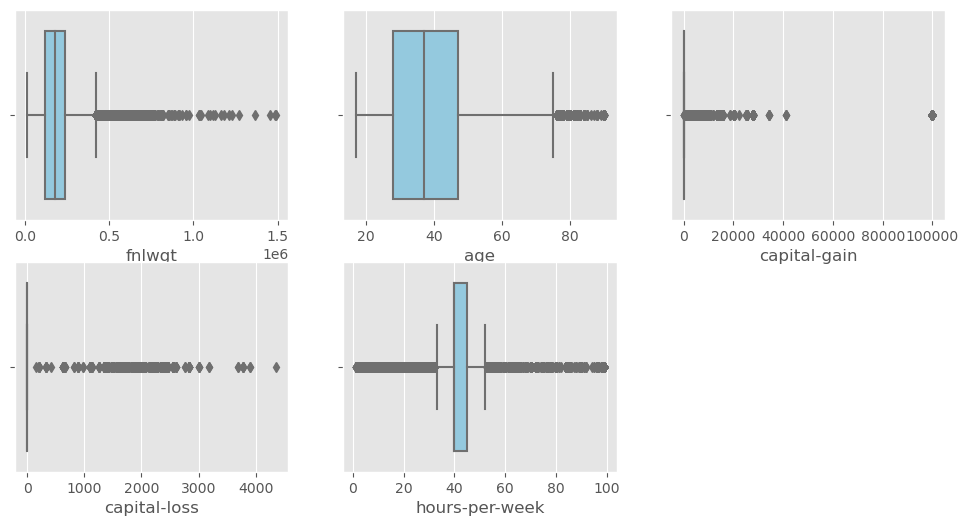

(2, 3778)


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,occupation_enc,workclass_enc,country_enc,sex_enc,marital_status_enc,race_enc,relationship_enc,income
0,25,226802,7,0,0,40,0.065676,0.736522,1,1,0.322807,0.093494,0.146522,0
1,38,89814,9,0,0,50,0.032727,0.736522,1,1,0.465592,0.860267,0.412764,0
2,28,336951,12,0,0,40,0.021582,0.068551,1,1,0.465592,0.860267,0.412764,1
3,44,160323,10,7688,0,40,0.065676,0.736522,1,1,0.465592,0.093494,0.412764,1
5,34,198693,6,0,0,30,0.106320,0.736522,1,1,0.322807,0.860267,0.258768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0.031401,0.736522,1,0,0.465592,0.860267,0.046239,0
48838,40,154374,9,0,0,40,0.065676,0.736522,1,1,0.465592,0.860267,0.412764,1
48839,58,151910,9,0,0,40,0.122507,0.736522,1,0,0.028238,0.860267,0.105878,0
48840,22,201490,9,0,0,20,0.122507,0.736522,1,1,0.322807,0.860267,0.146522,0


In [43]:
plt.style.use('default')
plt.style.use('ggplot')
clist = ['fnlwgt','age','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize = (12,6))
for i in range(0, len(clist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(data[clist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()
from scipy.stats import zscore
zabs = np.abs(zscore(new_ds.loc[:,'fnlwgt':'hours-per-week']))
print(np.shape(np.where(zabs >= 3)))
new_ds = new_ds[(zabs < 3).all(axis = 1)]
new_ds

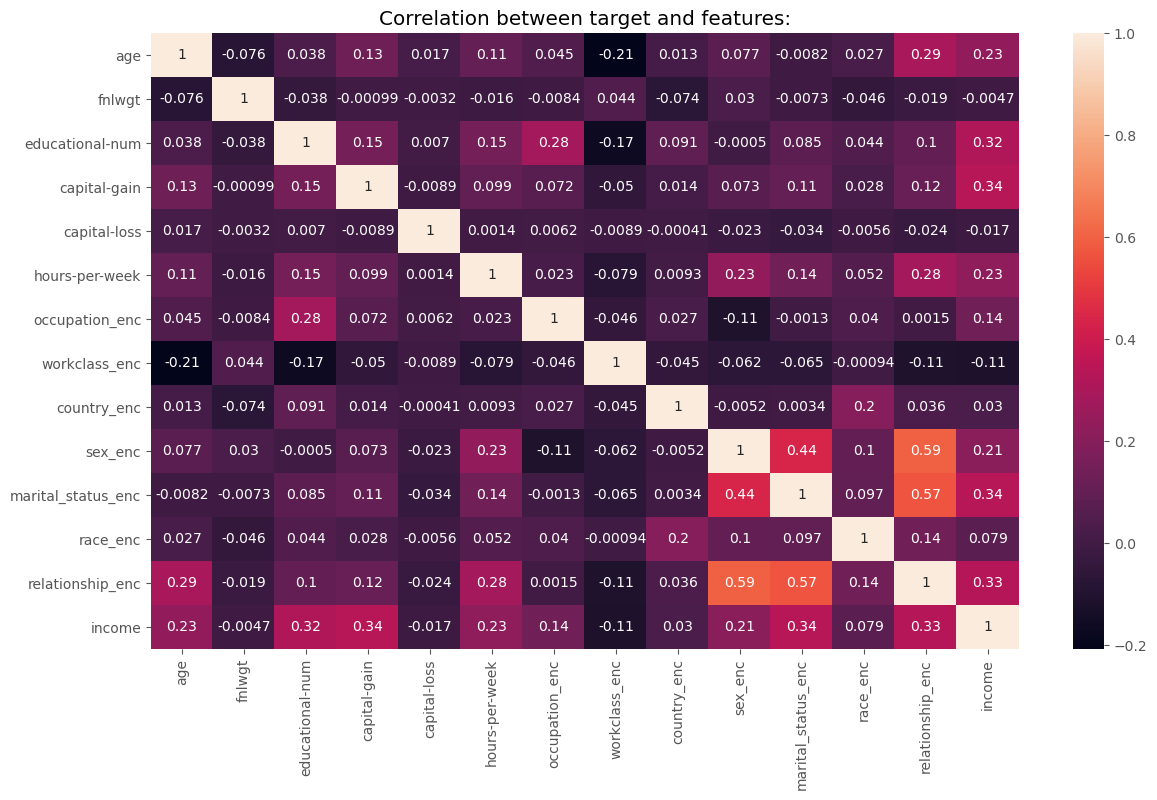

In [44]:
plt.figure(figsize = (14, 8))
plt.title("Correlation between target and features:")
sns.heatmap(new_ds.corr(), annot = True)
plt.show()

In [45]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
new_ds.loc[:,'age':'hours-per-week'] = scale.fit_transform(new_ds.loc[:,'age':'hours-per-week'])
new_ds

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,occupation_enc,workclass_enc,country_enc,sex_enc,marital_status_enc,race_enc,relationship_enc,income
0,0.109589,0.432408,0.307692,0.00000,0.0,0.492958,0.065676,0.736522,1,1,0.322807,0.093494,0.146522,0
1,0.287671,0.154354,0.461538,0.00000,0.0,0.633803,0.032727,0.736522,1,1,0.465592,0.860267,0.412764,0
2,0.150685,0.655985,0.692308,0.00000,0.0,0.492958,0.021582,0.068551,1,1,0.465592,0.860267,0.412764,1
3,0.369863,0.297471,0.538462,0.34882,0.0,0.492958,0.065676,0.736522,1,1,0.465592,0.093494,0.412764,1
5,0.232877,0.375353,0.230769,0.00000,0.0,0.352113,0.106320,0.736522,1,1,0.322807,0.860267,0.258768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.494316,0.692308,0.00000,0.0,0.464789,0.031401,0.736522,1,0,0.465592,0.860267,0.046239,0
48838,0.315068,0.285396,0.461538,0.00000,0.0,0.492958,0.065676,0.736522,1,1,0.465592,0.860267,0.412764,1
48839,0.561644,0.280394,0.461538,0.00000,0.0,0.492958,0.122507,0.736522,1,0,0.028238,0.860267,0.105878,0
48840,0.068493,0.381030,0.461538,0.00000,0.0,0.211268,0.122507,0.736522,1,1,0.322807,0.860267,0.146522,0


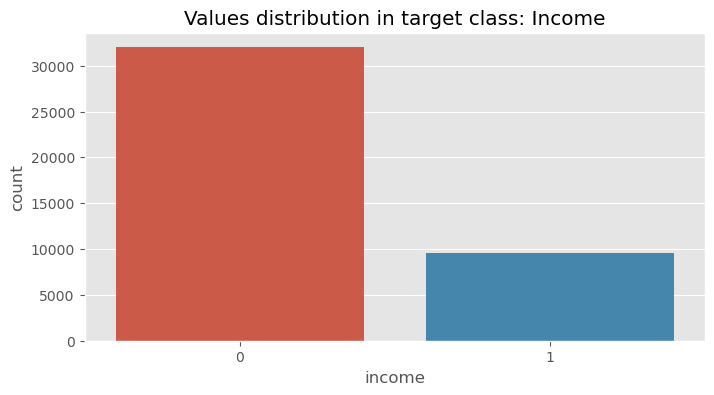

In [46]:
plt.figure(figsize = (8, 4))
plt.title("Values distribution in target class: Income")
sns.countplot(data = new_ds, x = 'income')
plt.show()

In [51]:
from imblearn.combine import SMOTETomek
x = new_ds.loc[:,"age":"relationship_enc"]
y = new_ds.loc[:,"income"]
smk = SMOTETomek()
x_new, y_new = smk.fit_resample(x, y)

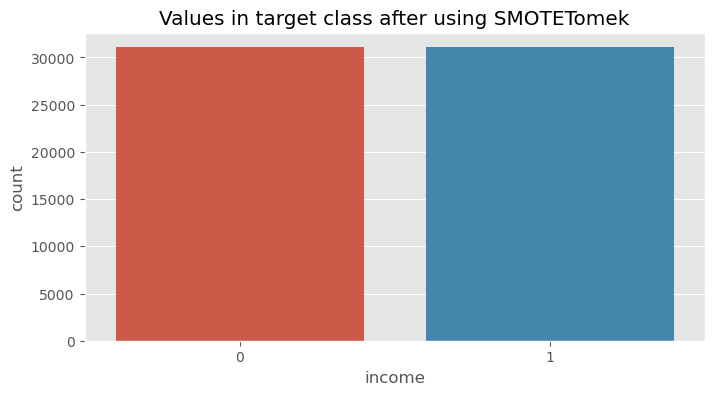

In [52]:
plt.figure(figsize = (8, 4))
plt.title("Values in target class after using SMOTETomek")
sns.countplot(x = y_new)
plt.show()

In [53]:
new_ds.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,occupation_enc,workclass_enc,country_enc,sex_enc,marital_status_enc,race_enc,relationship_enc,income
0,0.109589,0.432408,0.307692,0.00000,0.0,0.492958,0.065676,0.736522,1,1,0.322807,0.093494,0.146522,0
1,0.287671,0.154354,0.461538,0.00000,0.0,0.633803,0.032727,0.736522,1,1,0.465592,0.860267,0.412764,0
2,0.150685,0.655985,0.692308,0.00000,0.0,0.492958,0.021582,0.068551,1,1,0.465592,0.860267,0.412764,1
3,0.369863,0.297471,0.538462,0.34882,0.0,0.492958,0.065676,0.736522,1,1,0.465592,0.093494,0.412764,1
5,0.232877,0.375353,0.230769,0.00000,0.0,0.352113,0.106320,0.736522,1,1,0.322807,0.860267,0.258768,0


In [82]:
new_ds.iloc[:, :-1]

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,occupation_enc,workclass_enc,country_enc,sex_enc,marital_status_enc,race_enc,relationship_enc
0,25,226802,7,0,0,40,0.065676,0.736522,1,1,0.322807,0.093494,0.146522
1,38,89814,9,0,0,50,0.032727,0.736522,1,1,0.465592,0.860267,0.412764
2,28,336951,12,0,0,40,0.021582,0.068551,1,1,0.465592,0.860267,0.412764
3,44,160323,10,7688,0,40,0.065676,0.736522,1,1,0.465592,0.093494,0.412764
5,34,198693,6,0,0,30,0.106320,0.736522,1,1,0.322807,0.860267,0.258768
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0.031401,0.736522,1,0,0.465592,0.860267,0.046239
48838,40,154374,9,0,0,40,0.065676,0.736522,1,1,0.465592,0.860267,0.412764
48839,58,151910,9,0,0,40,0.122507,0.736522,1,0,0.028238,0.860267,0.105878
48840,22,201490,9,0,0,20,0.122507,0.736522,1,1,0.322807,0.860267,0.146522


In [81]:
X =new_ds.iloc[:, :-1].values
X

array([[2.50000000e+01, 2.26802000e+05, 7.00000000e+00, ...,
        3.22807483e-01, 9.34943169e-02, 1.46521605e-01],
       [3.80000000e+01, 8.98140000e+04, 9.00000000e+00, ...,
        4.65591969e-01, 8.60267127e-01, 4.12763699e-01],
       [2.80000000e+01, 3.36951000e+05, 1.20000000e+01, ...,
        4.65591969e-01, 8.60267127e-01, 4.12763699e-01],
       ...,
       [5.80000000e+01, 1.51910000e+05, 9.00000000e+00, ...,
        2.82384680e-02, 8.60267127e-01, 1.05877670e-01],
       [2.20000000e+01, 2.01490000e+05, 9.00000000e+00, ...,
        3.22807483e-01, 8.60267127e-01, 1.46521605e-01],
       [5.20000000e+01, 2.87927000e+05, 9.00000000e+00, ...,
        4.65591969e-01, 8.60267127e-01, 4.62385565e-02]])

In [67]:
new_ds.iloc[:, -1]

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 41536, dtype: int32

In [66]:
y = new_ds.iloc[:, -1].values
y

array([0, 0, 1, ..., 0, 0, 1])

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
cf=classifier.fit(X_train, y_train)
cf.intercept_

array([-10.33542043])

In [57]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [58]:
cf.coef_

array([[ 3.13967818,  0.49975474,  4.1622462 ,  7.00668783, -0.98366344,
         2.81836539,  4.02200544,  0.04592657,  0.14642638,  0.17827028,
         7.17630669,  0.2870692 ,  0.62406095]])

In [65]:
cf.predict_proba(X)

array([[0.98283733, 0.01716267],
       [0.78781964, 0.21218036],
       [0.73168148, 0.26831852],
       ...,
       [0.98078922, 0.01921078],
       [0.98030079, 0.01969921],
       [0.02120723, 0.97879277]])

In [64]:
cf.score(X,y)

0.8366718027734977

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [62]:
confusion_matrix(y_test, y_pred)

array([[7514,  478],
       [1193, 1199]], dtype=int64)

In [61]:
accuracy_score(y_test, y_pred)

0.8390793528505393